# **1.0: Import Libraries**

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# **2.0: Load Dataset**

In [4]:
df = pd.read_csv("E-commerce Customer Behavior - Sheet1.csv")

# **3.0: Data Exploration**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [6]:
print(f'No of columns in the dataset: {df.shape[1]}\nNo of rows in the dataset: {df.shape[0]}')

No of columns in the dataset: 11
No of rows in the dataset: 350


In [7]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [8]:
df.dtypes

Customer ID                   int64
Gender                       object
Age                           int64
City                         object
Membership Type              object
Total Spend                 float64
Items Purchased               int64
Average Rating              float64
Discount Applied               bool
Days Since Last Purchase      int64
Satisfaction Level           object
dtype: object

# **4.0: Data Preprocessing**

> 4.1: Handling Missing Values

> 4.2: Encoding Categorical Variables

## **4.1: Handling Missing Values**

In [9]:
df.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [10]:
#fill the missing values by using mode
df['Satisfaction Level'].fillna(df['Satisfaction Level'].mode()[0], inplace=True)

## **4.2: Encoding Categorical Variables**

In [11]:
# Convert categorical variables to numerical values
df = pd.get_dummies(df, columns=['Gender', 'City', 'Membership Type'], drop_first=True)

In [12]:
satisfaction_mapping = {
    'Neutral': 0,
    'Satisfied': 1,
    'Unsatisfied': 2
}

df['Satisfaction Level'] = df['Satisfaction Level'].map(satisfaction_mapping)

In [13]:
df.head()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Gender_Male,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco,Membership Type_Gold,Membership Type_Silver
0,101,29,1120.20,14,4.6,True,25,1,False,False,False,False,True,False,True,False
1,102,34,780.50,11,4.1,False,18,0,True,False,True,False,False,False,False,True
2,103,43,510.75,9,3.4,True,42,2,False,False,False,False,False,False,False,False
3,104,30,1480.30,19,4.7,False,12,1,True,False,False,False,False,True,True,False
4,105,27,720.40,13,4.0,True,55,2,True,False,False,True,False,False,False,True


# **5.1: Feature Selection**

In [14]:
features = df[['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied', 
               'Days Since Last Purchase', 'Satisfaction Level']]

# **6.1: Data Scaling**

In [15]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# **7.1: Determine the Optimal Number of Clusters**

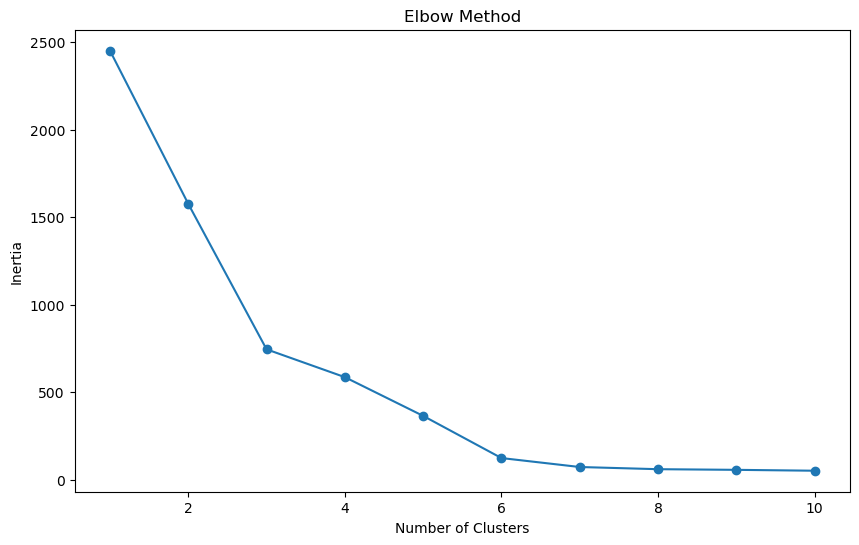

In [16]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# **8.1: Apply K-Means Clustering**

In [17]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

In [18]:
df.head()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Gender_Male,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco,Membership Type_Gold,Membership Type_Silver,Cluster
0,101,29,1120.20,14,4.6,True,25,1,False,False,False,False,True,False,True,False,1
1,102,34,780.50,11,4.1,False,18,0,True,False,True,False,False,False,False,True,0
2,103,43,510.75,9,3.4,True,42,2,False,False,False,False,False,False,False,False,2
3,104,30,1480.30,19,4.7,False,12,1,True,False,False,False,False,True,True,False,1
4,105,27,720.40,13,4.0,True,55,2,True,False,False,True,False,False,False,True,2


# **9.1: Analyze the Clusters**

In [20]:
# Analyze clusters
cluster_analysis = df.groupby('Cluster').mean()
cluster_analysis

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Gender_Male,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco,Membership Type_Gold,Membership Type_Silver
Cluster,,,,,,,,,,,,,,,,
0,276.068376,35.401709,627.725641,9.641026,3.687179,0.000000,18.982906,0.08547,0.504274,0.495726,0.504274,0.0,0.000000,0.000000,0.0,0.504274
1,274.572650,29.923077,1311.144444,17.615385,4.675214,0.504274,17.940171,1.00000,0.504274,0.000000,0.000000,0.0,0.504274,0.495726,1.0,0.000000
2,275.862069,35.482759,595.136207,10.525862,3.692241,1.000000,42.982759,2.00000,0.491379,0.000000,0.000000,0.5,0.000000,0.000000,0.0,0.500000


# **10.1: Visualization**

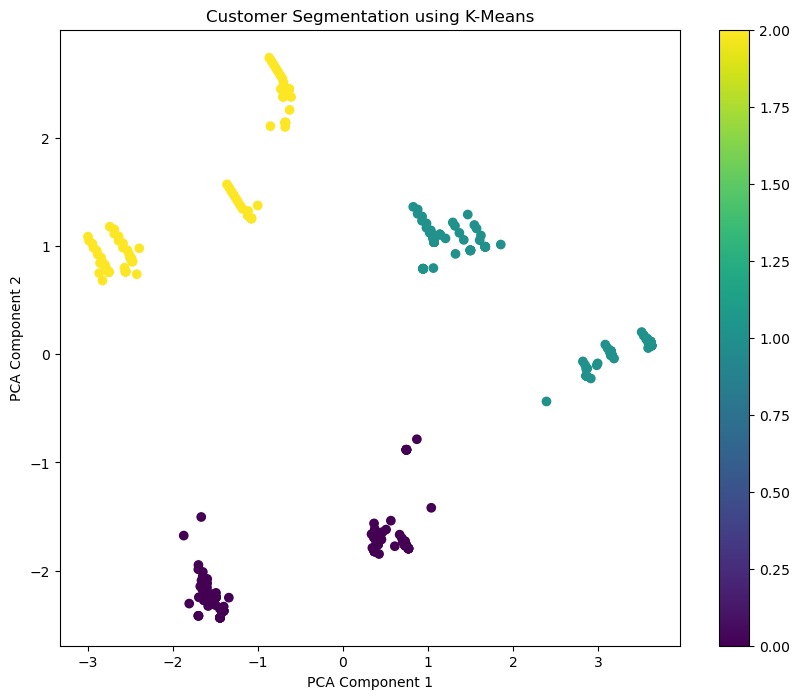

In [21]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('Customer Segmentation using K-Means')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

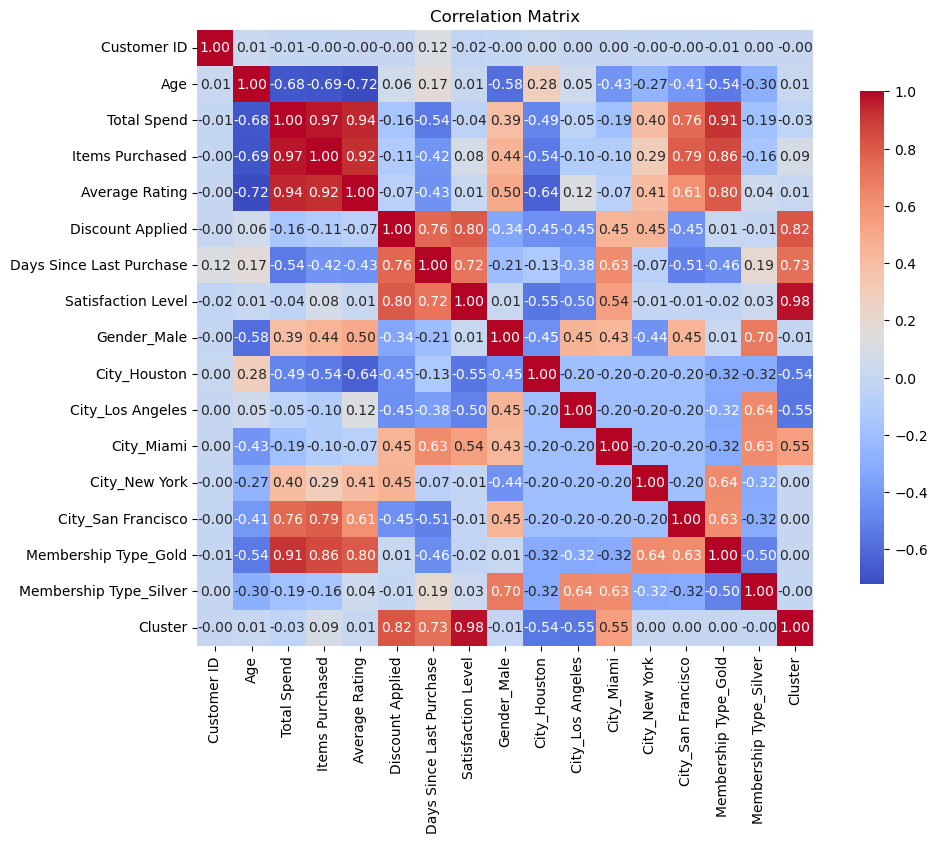

In [23]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

Based on the cluster analysis shown in the image, we can identify three distinct customer segments. Let's develop targeted marketing strategies for each:

1. Segment 1 (Yellow cluster - top left and middle):
Characteristics: These customers appear to have high values on PCA Component 2 and varied values on Component 1.
Potential interpretation: High-value or premium customers.

Strategy:
- Offer exclusive, premium products or services
- Implement a loyalty program with high-tier rewards
- Provide personalized concierge services
- Host exclusive events or early access to new products
- Use targeted email campaigns highlighting luxury or high-end offerings

2. Segment 2 (Teal cluster - right side):
Characteristics: These customers have moderate to high values on PCA Component 1 and moderate values on Component 2.
Potential interpretation: Mid-range, consistent customers.

Strategy:
- Develop bundled offerings or package deals to increase average purchase value
- Implement a referral program to leverage their potential network
- Create targeted cross-selling and upselling campaigns
- Offer moderate loyalty rewards to encourage continued engagement
- Use personalized product recommendations based on purchase history

3. Segment 3 (Purple cluster - bottom):
Characteristics: These customers have low values on PCA Component 2 and varied values on Component 1.
Potential interpretation: Price-sensitive or infrequent customers.

Strategy:
- Implement flash sales or limited-time offers to drive purchases
- Create a tiered pricing structure to encourage upgrades
- Develop a re-engagement campaign for inactive customers
- Offer cost-effective alternatives or entry-level products
- Use educational content marketing to showcase product value

General recommendations:
1. Personalize communication for each segment based on their preferences and behaviors.
2. Continuously monitor and analyze customer behavior within each segment to refine strategies.
3. Implement A/B testing for marketing campaigns to optimize effectiveness for each segment.
4. Develop a customer feedback loop to gain insights and improve offerings for each segment.
5. Consider creating transitional strategies to move customers from lower-value segments to higher-value ones over time.

Remember, these strategies are based on assumptions drawn from the cluster analysis visualization. For more accurate and detailed strategies, you'd need to correlate these clusters with actual customer data, purchase history, and other relevant metrics specific to your business.